#  Predicting the Sale Price of Houses using Machine Learning


## 1. Problem defition

> This project aims to build a machine learning model that will give the best future sales prediction of homes and improve the log error i.e. the error due to the difference between the actual and the predicted home values.

## 2. Data
The data is downloaded from the Kaggle Bluebook for Zillow price competition: https://www.kaggle.com/c/zillow-prize-1/data

There are 3 main datasets:

* properties_2016.csv - all the properties with their home features for 2016. 
* properties_2017.csv - all the properties with their home features for 2017 (released on 10/2/2017)
* train_2016.csv - the training set with transactions from 1/1/2016 to 12/31/2016
* train_2017.csv - the training set with transactions from 1/1/2017 to 9/15/2017 (released on 10/2/2017)

## 3. Evaluation
The evaluation metric for this competition is the MAE (Mean Absolute Error) between the predicted log error and the actual log error.

For more on the evaluation of this project check: https://www.kaggle.com/c/zillow-prize-1/overview/evaluation

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset.

There are two datasets available –

* train_2016 – This dataset consists of the target variable i.e., the logerror 
* properties_2016 – Contents all the features related to the property/home.
 

There are around 60 attributes in the dataset on basis of which the model can be built.

Some of the important features amongst them are as follows: 

* train_2016: 
    1. parcelid - Unique identification for every parcel
    2. transactiondate - The date on which the home was sold
    3. logerror - The residual between the actual and the predicted sale price of homes. (Target Array)
 

* properties_2016:
    1. parcelid - Unique identification for every parcel (common in both the datasets)
    2. bathroomcnt - Total number of bathrooms in the house  
    3. bedroomcnt - Total number of bedrooms in the house
    4. buildingqualitytypeid - This gives the quality assessment of the building ranging from best to worst.
    5. finishedsqaurefeet12 - Finished living area of the house. 
    6. fips - This stand for Federal Information Processing Standard code (for more detail regarding this check:https://en.wikipedia.org/wiki/FIPS_county_code
    7. latitude & longitude - longitude and latitude of the home location 
    8. propertylandusetypeid - This gives the type of land the property is zoned for.
    9regionidcity - The city in which the property is situated.
regionidcounty - The county where the property is situated. 
regionidzip - This provides the zip code for the location of the property.
taxamount - Property tax for each assessment year

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
properties_2016 = pd.read_csv("../../../../../House_price_regression_data/properties_2016.csv")
train_2016 = pd.read_csv("../../../../../House_price_regression_data/train_2016_v2.csv")

In [3]:
properties_2016.shape

(2985217, 58)

In [4]:
train_2016.shape

(90275, 3)

In [5]:
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [6]:
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [7]:
final_df = pd.merge(properties_2016, train_2016, how='inner', on='parcelid')
final_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [8]:
final_df.shape

(90275, 60)

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   airconditioningtypeid         28781 non-null  float64
 2   architecturalstyletypeid      261 non-null    float64
 3   basementsqft                  43 non-null     float64
 4   bathroomcnt                   90275 non-null  float64
 5   bedroomcnt                    90275 non-null  float64
 6   buildingclasstypeid           16 non-null     float64
 7   buildingqualitytypeid         57364 non-null  float64
 8   calculatedbathnbr             89093 non-null  float64
 9   decktypeid                    658 non-null    float64
 10  finishedfloor1squarefeet      6856 non-null   float64
 11  calculatedfinishedsquarefeet  89614 non-null  float64
 12  finishedsquarefeet12          85596 non-null  float64
 13  f

In [10]:
categorical = final_df.select_dtypes(include='object').columns
categorical

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag', 'transactiondate'],
      dtype='object')

In [11]:
final_df.isnull().sum()

parcelid                            0
airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
latitude                            0
longitude                           0
lotsizesquar

In [12]:
final_df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,9.027500e+04,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,90275.000000,9607.000000,89093.000000,29937.000000,29937.000000,56080.000000,9.027500e+04,9.027500e+04,8.012500e+04,17901.0,969.000000,1161.0,1204.0,16697.0,90275.000000,9.027500e+04,88472.000000,90275.000000,36012.000000,90240.000000,90275.000000,43.0,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000
mean,1.298466e+07,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,66.0,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,1.187884,2.241231,1.812005,345.521228,3.926979,3.400541e+07,-1.181989e+08,2.911016e+04,1.0,519.827657,1.0,1.0,1.0,261.832179,6.049179e+07,33761.332851,2525.420770,190646.540237,96586.131184,1.478516,7.0,1.008743,6.010033,1.110414,310.142101,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,0.011457
std,2.504510e+06,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,0.0,652.399026,928.162393,909.941166,110.108211,1068.207182,673.703488,1346.255242,20.663461,0.484173,0.963142,0.608761,267.015918,3.684382,2.649654e+05,3.606032e+05,1.217213e+05,0.0,155.054210,0.0,0.0,0.0,5.182901,2.050549e+05,46672.393863,805.694842,166228.910572,3661.339094,2.819627,0.0,0.100830,0.437235,0.797235,216.721869,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,0.161079
min,1.071174e+07,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,-4.605000
25%,1.155950e+07,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381154e+07,-1.184117e+08,5.703000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037320e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,-0.025300
50%,1.254734e+07,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,6037.000000,1.000000,2.000000,2.000000,433.000000,2.000000,3.402150e+07,-1.181734e+08,7.200000e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037620e+07,25218.0

### Dealing with the missing values:

In [13]:
mis_val = [var for var in final_df.columns if final_df[var].isnull().sum()>0]

final_df[mis_val].isnull().sum()

airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
pooltypeid7                     73578
propertycoun

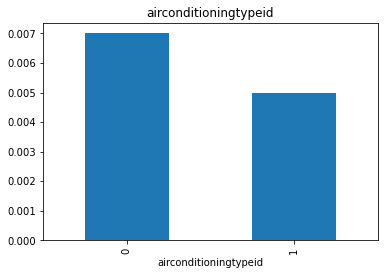

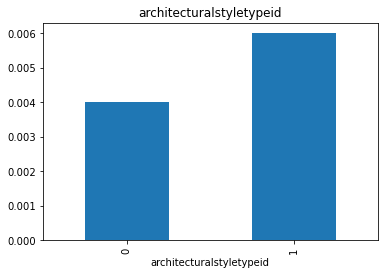

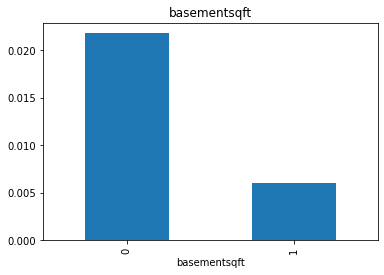

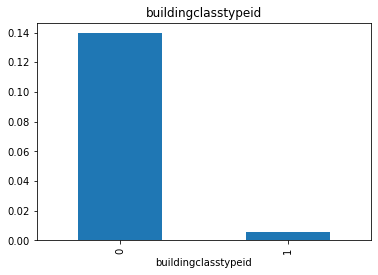

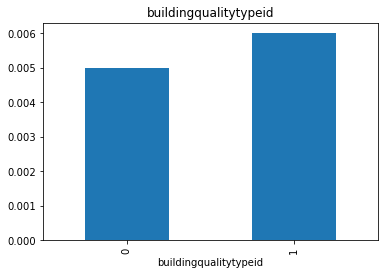

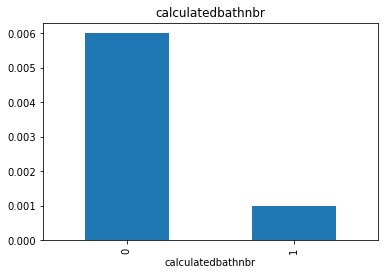

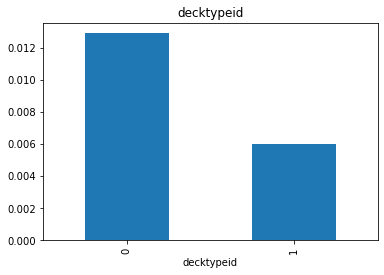

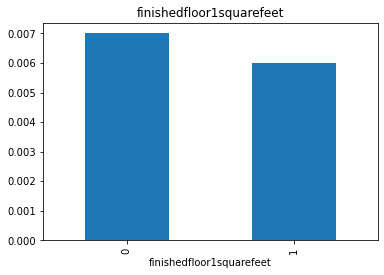

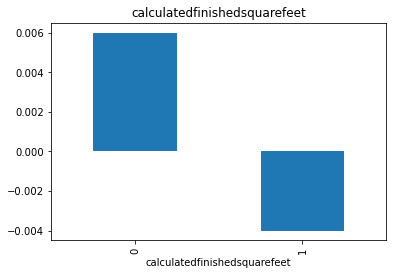

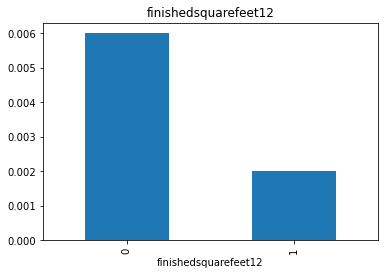

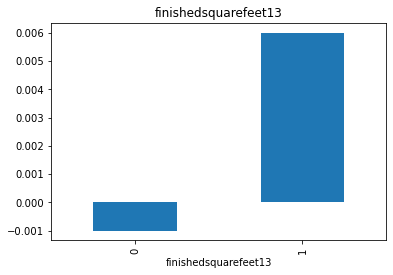

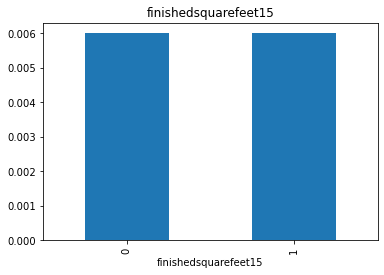

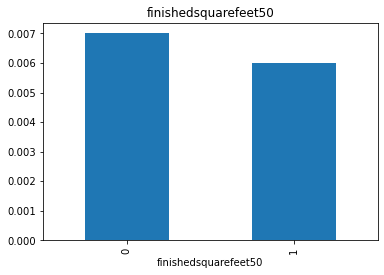

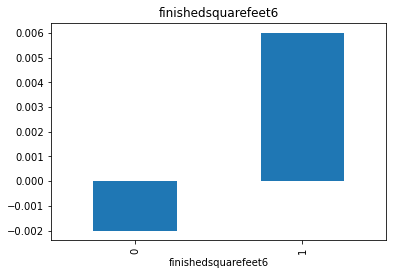

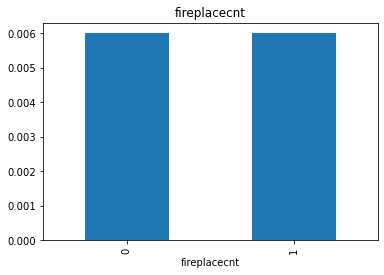

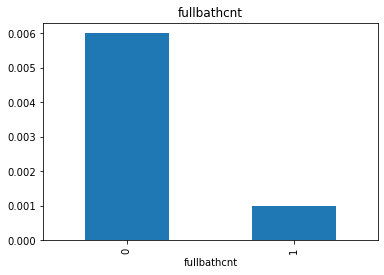

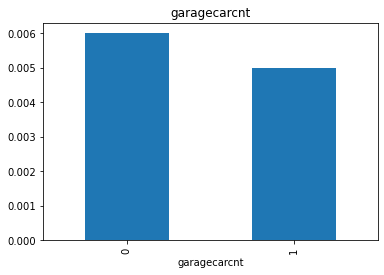

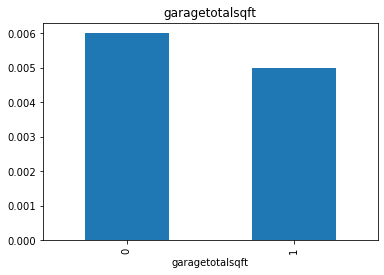

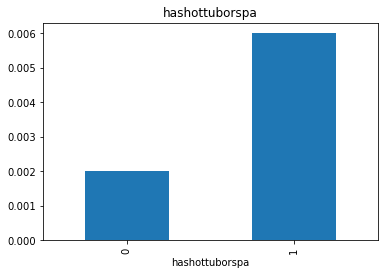

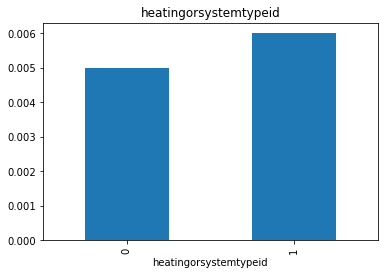

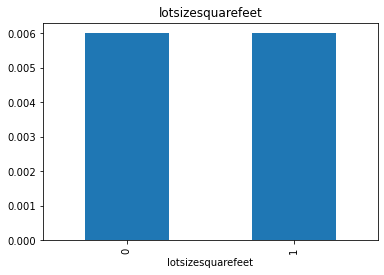

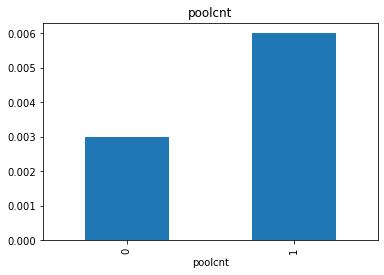

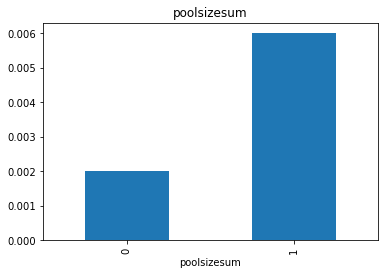

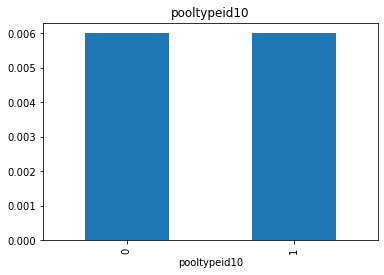

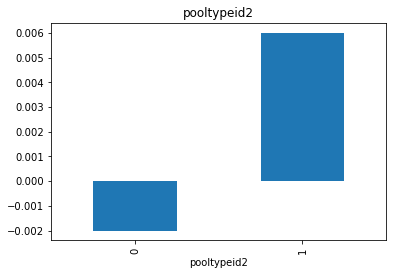

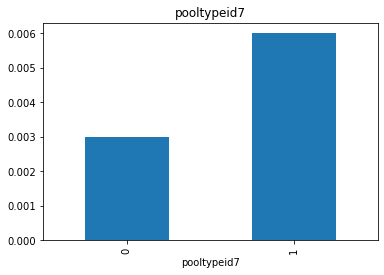

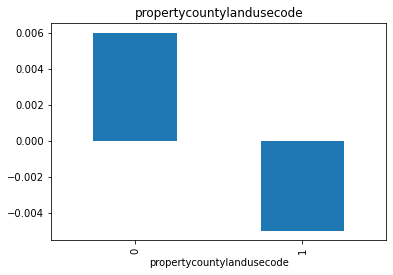

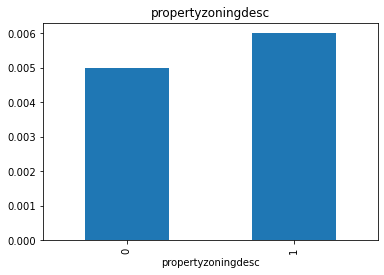

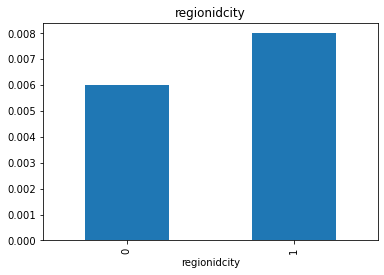

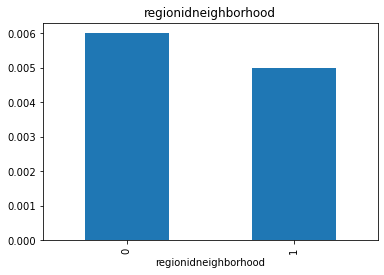

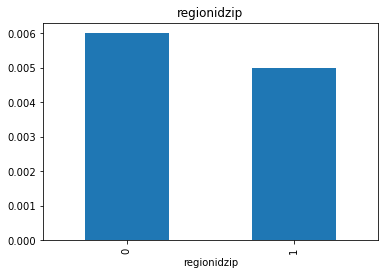

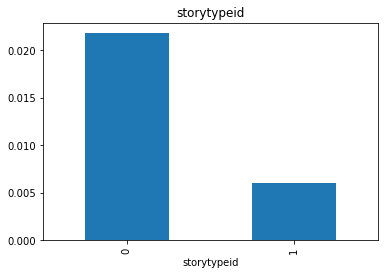

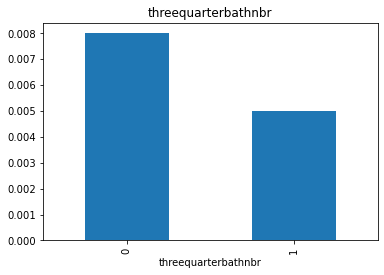

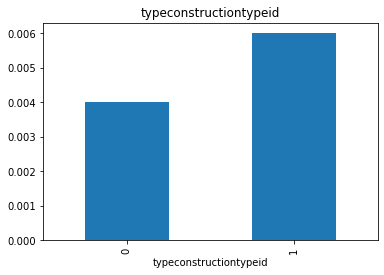

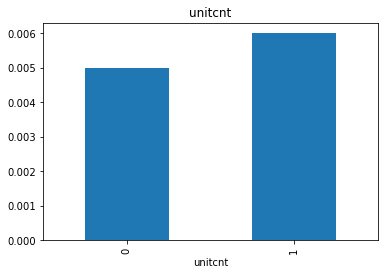

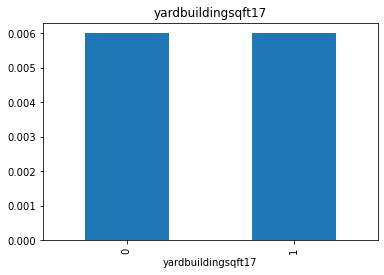

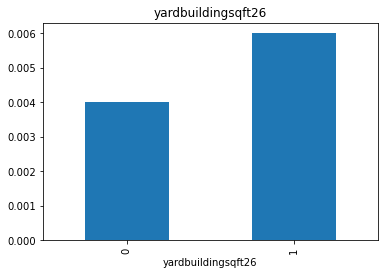

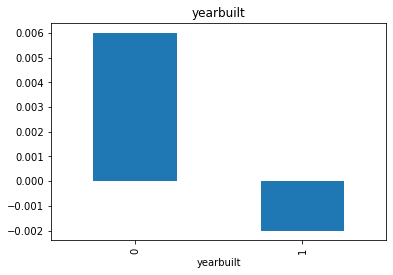

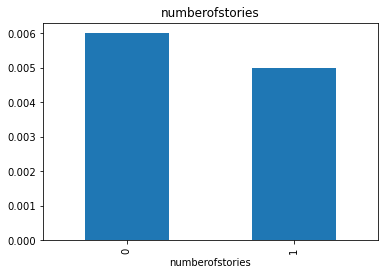

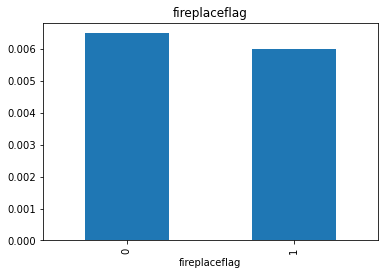

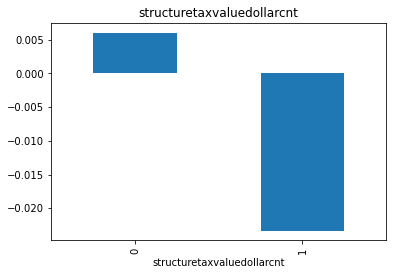

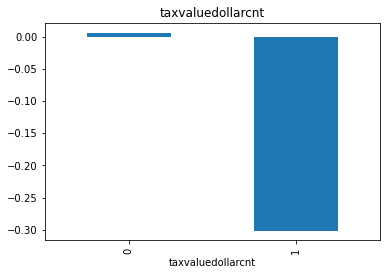

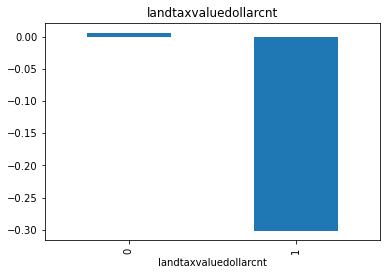

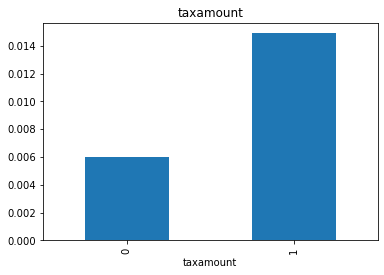

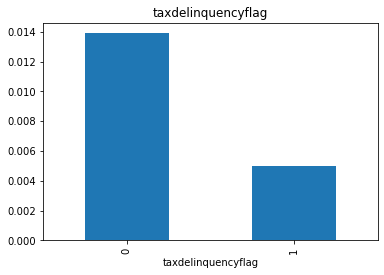

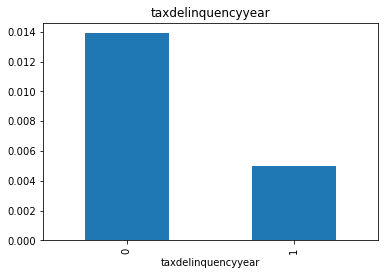

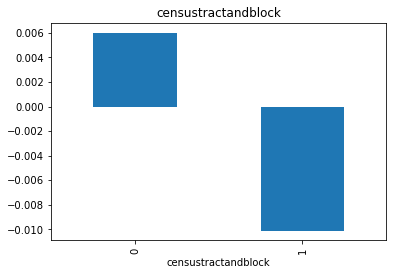

In [14]:
# Relationship between missing values and target_variables(log error) :
def analyze_missing_values(df, var):
    new_df = df.copy()
    new_df[var] = np.where(new_df[var].isnull(),1,0)
    new_df.groupby(var)['logerror'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in mis_val:
    analyze_missing_values(final_df, var)

In [15]:
print("Total no of variables with missing value in the dataset: ", len(mis_val))

Total no of variables with missing value in the dataset:  47


In [16]:
num_vars = [var for var in final_df.columns if final_df[var].dtypes!= 'O']
print("Total no of numerical variables in the dataset: ", len(num_vars))

Total no of numerical variables in the dataset:  54


In [17]:
final_df[num_vars].columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt

In [18]:
cat_vars = [var for var in final_df.columns if final_df[var].dtypes== 'O']
print("Total no of categorical variables in the dataset: ", len(cat_vars))

Total no of categorical variables in the dataset:  6


In [19]:
final_df[cat_vars].columns

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag', 'transactiondate'],
      dtype='object')

In [20]:
# Cardinality of Categorical variables:

for var in cat_vars:
    print(var, len(final_df[var].unique()), " Categories")

hashottuborspa 2  Categories
propertycountylandusecode 78  Categories
propertyzoningdesc 1997  Categories
fireplaceflag 2  Categories
taxdelinquencyflag 2  Categories
transactiondate 352  Categories


In [21]:
# Temporal variables:
year_var = [var for var in num_vars if 'Yr' in var or 'year' in var ]
len(year_var), year_var

(3, ['yearbuilt', 'assessmentyear', 'taxdelinquencyyear'])

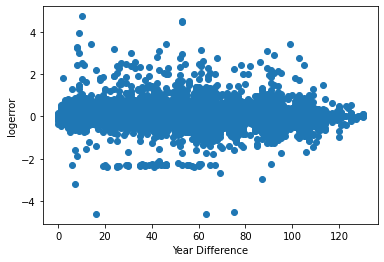

In [22]:
# Relationship between temporal variables and log error:

#calculate difference between year variable and year the house was sold
final_df[var] = final_df['assessmentyear'] - final_df['yearbuilt']  

plt.scatter(final_df[var],final_df['logerror'])
plt.xlabel('Year Difference')
plt.ylabel('logerror')
plt.show()

In [23]:
# Discrete variables:

discrete_vars = [var for var in num_vars if len(final_df[var].unique())<20]
print('No of discrete variables : ', len(discrete_vars))

No of discrete variables :  26


In [24]:
final_df[discrete_vars].columns

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid',
       'finishedsquarefeet13', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'heatingorsystemtypeid', 'poolcnt', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'regionidcounty',
       'roomcnt', 'storytypeid', 'threequarterbathnbr',
       'typeconstructiontypeid', 'unitcnt', 'numberofstories',
       'assessmentyear', 'taxdelinquencyyear'],
      dtype='object')

In [25]:
# Continuous variables:
cont_vars = [var for var in num_vars if var not in discrete_vars+year_var]
print('No of continuous variables : ', len(cont_vars))

No of continuous variables :  27


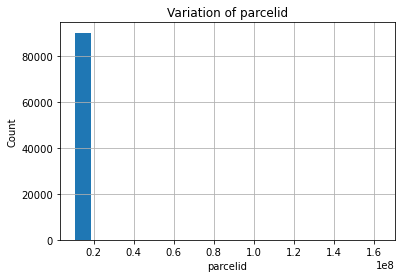

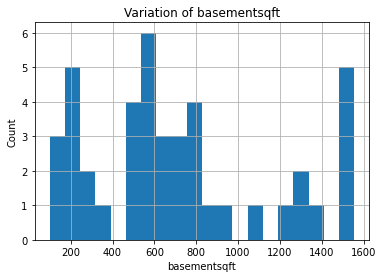

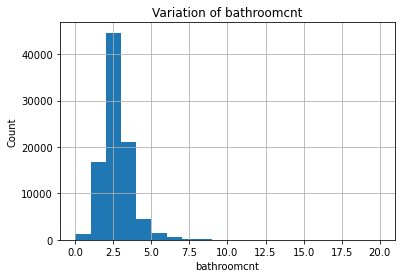

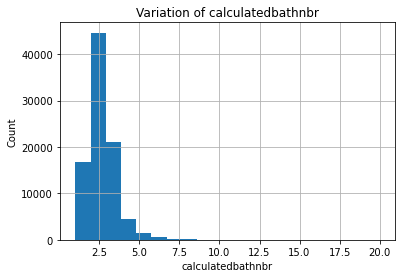

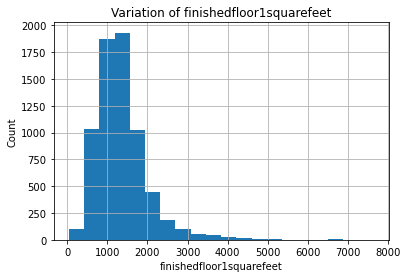

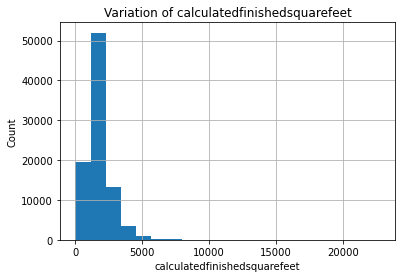

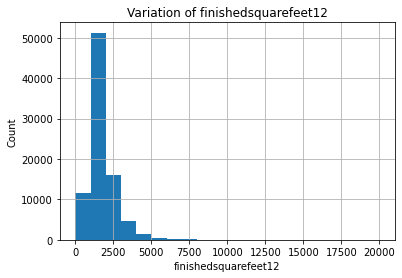

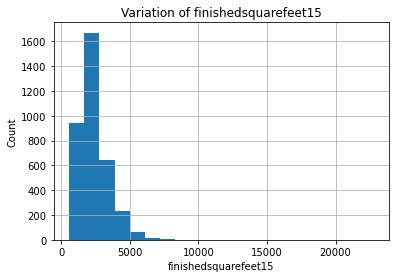

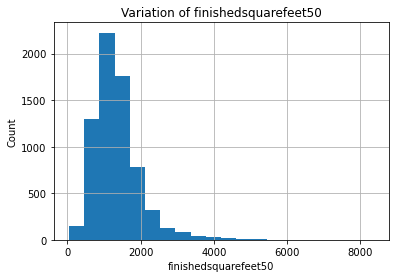

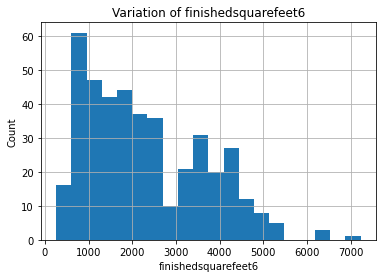

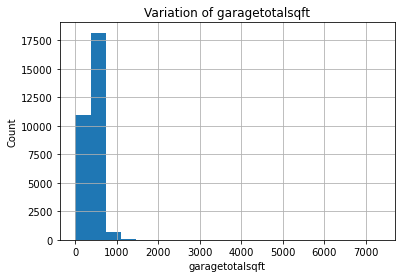

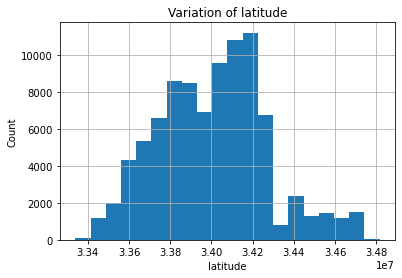

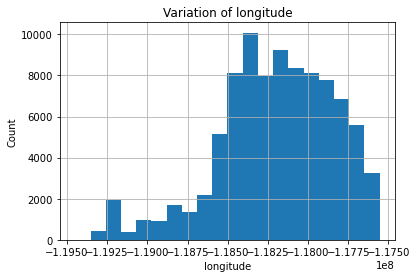

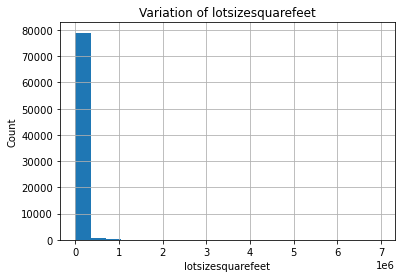

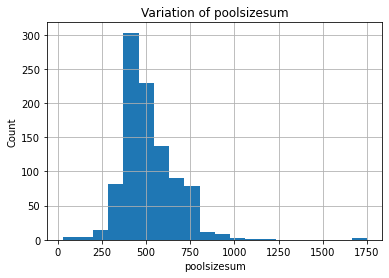

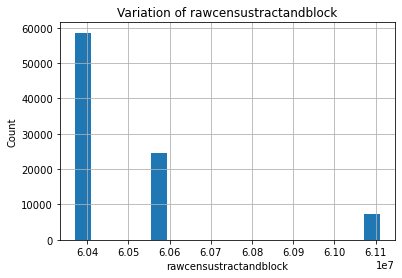

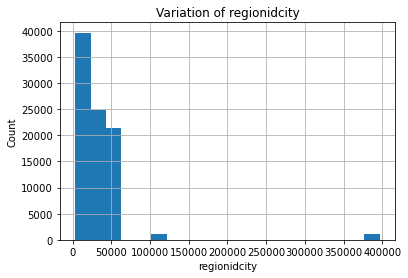

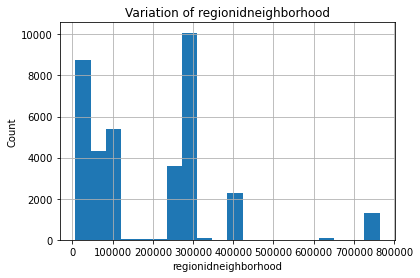

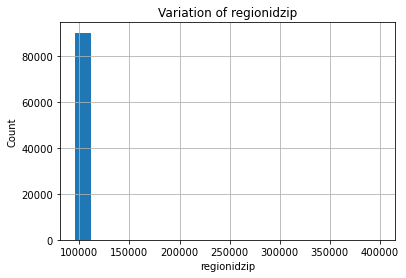

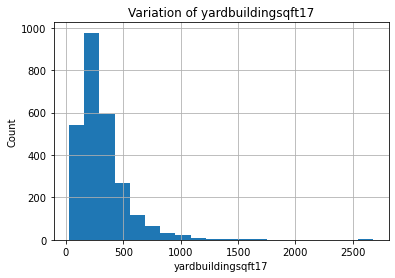

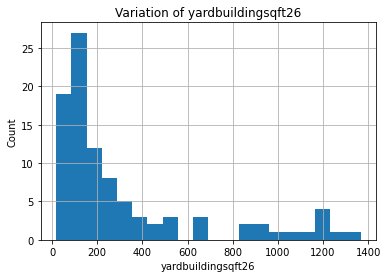

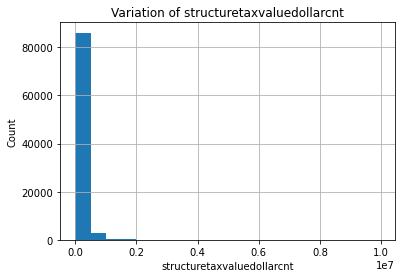

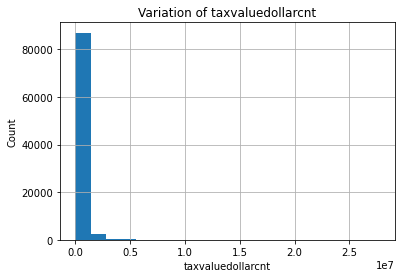

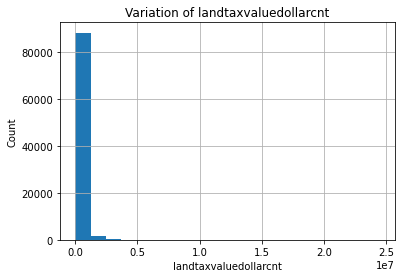

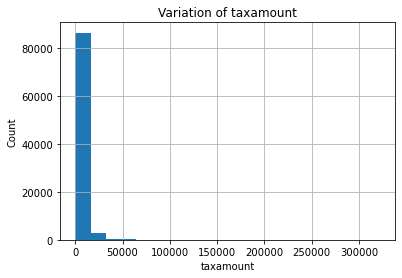

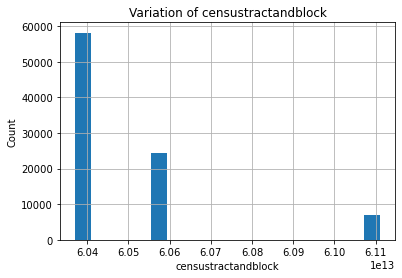

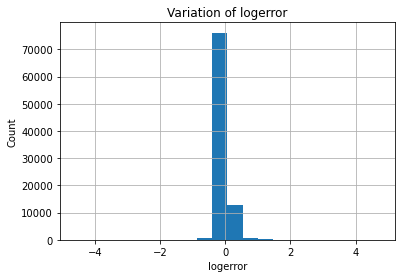

In [26]:
def analyze_cont_vars(df,var):
    
    new_df = final_df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in cont_vars:
    analyze_cont_vars(final_df,var)

Some of the variables are not normally distributed.

Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:

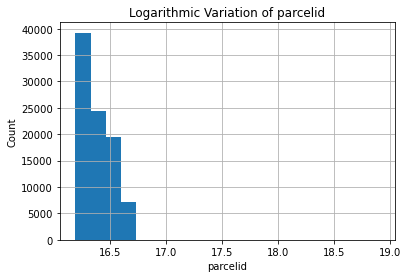

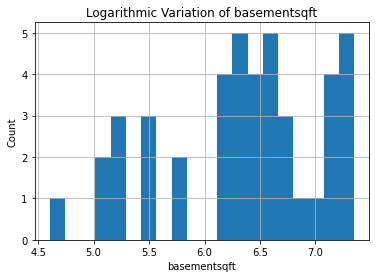

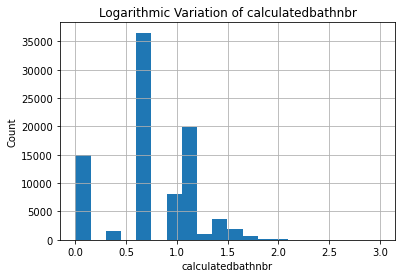

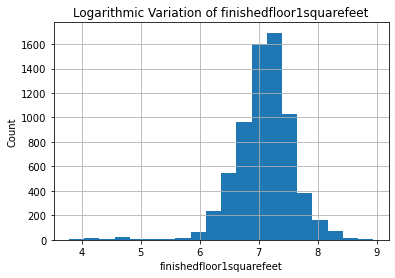

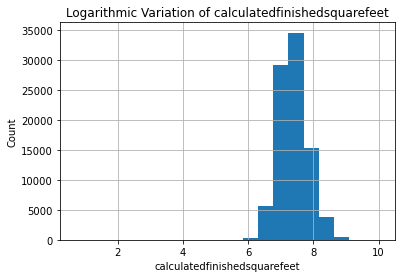

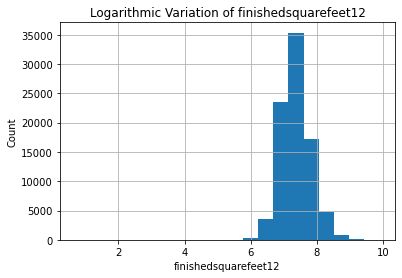

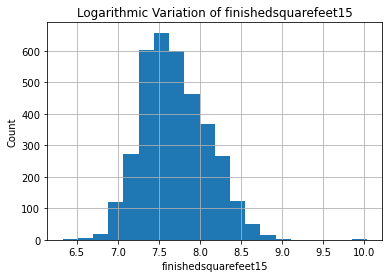

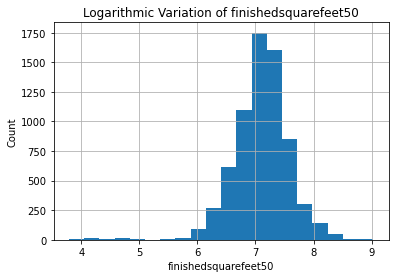

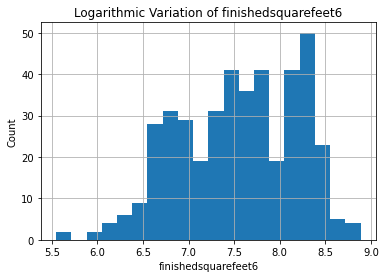

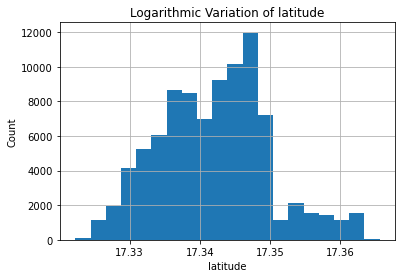

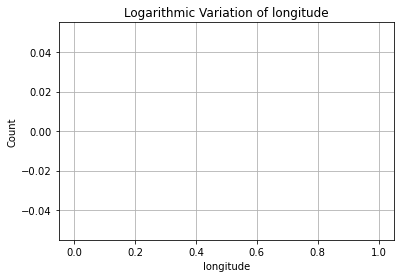

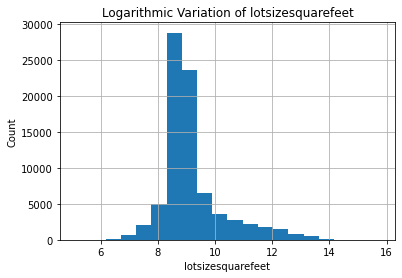

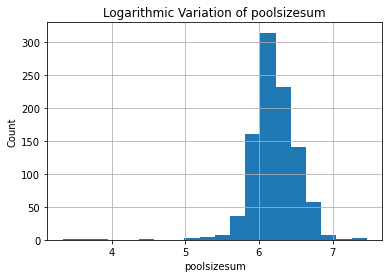

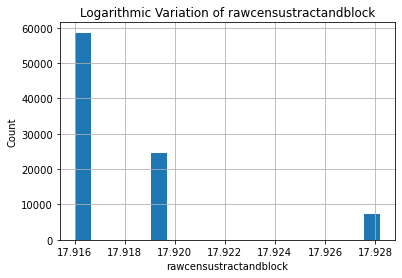

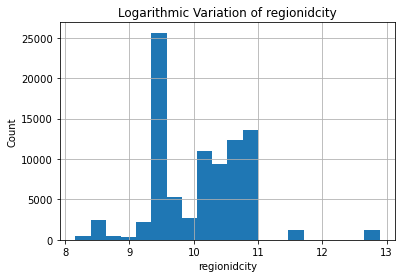

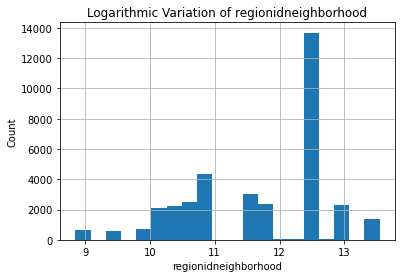

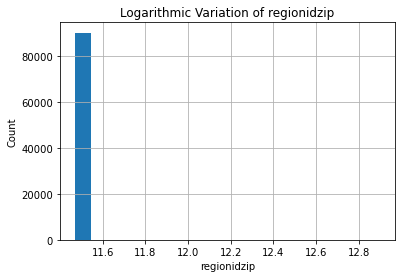

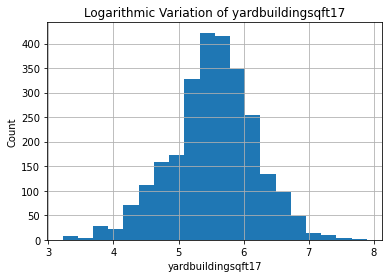

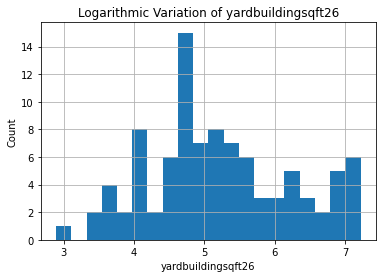

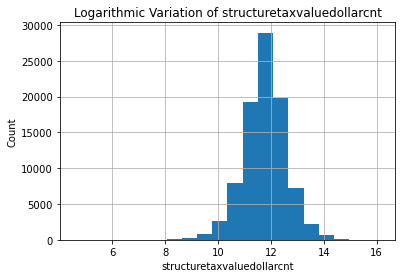

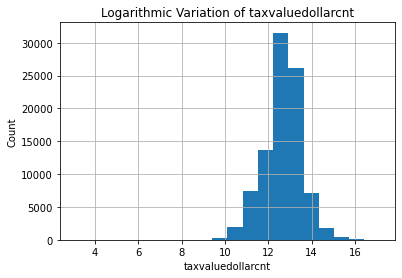

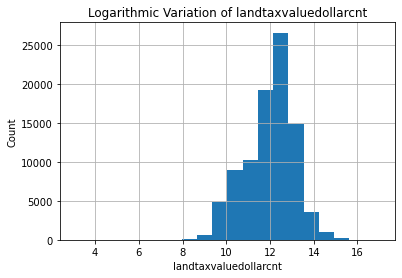

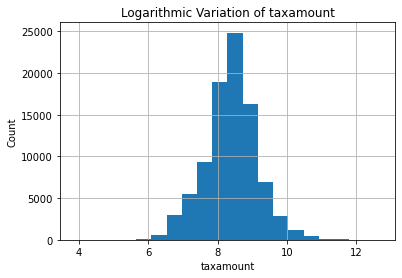

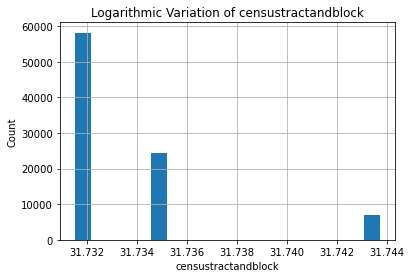

In [27]:
def analyze_log_variation(df,var):
    
    new_df = df.copy()
    if 0 in new_df[var].unique():
        pass
    else:
        #log Transformation of variables
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()
        
for var in cont_vars:
    analyze_log_variation(final_df,var)

We see that we get a better spread of the values for only few variables when we use the logarithmic transformation.

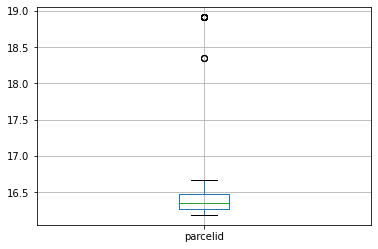

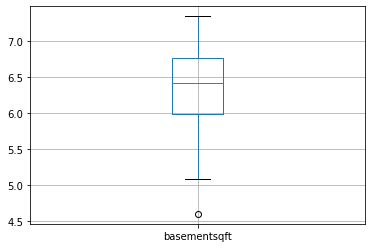

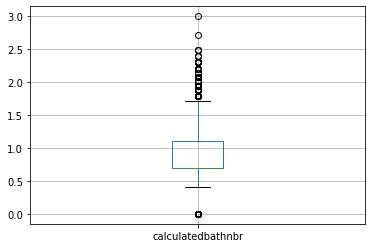

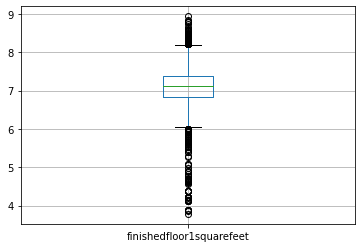

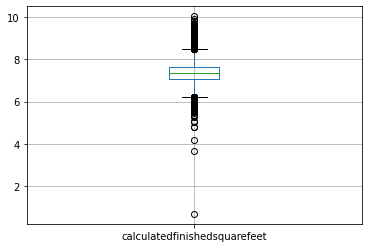

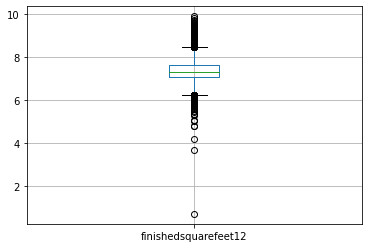

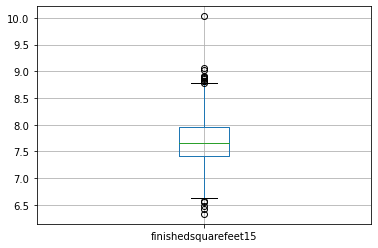

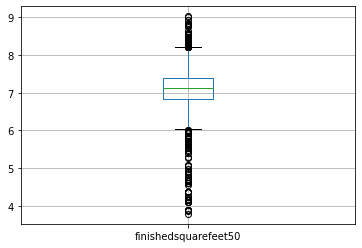

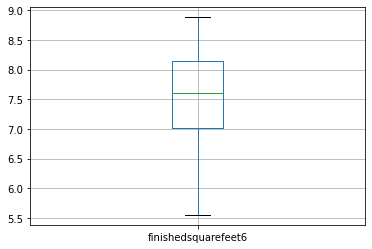

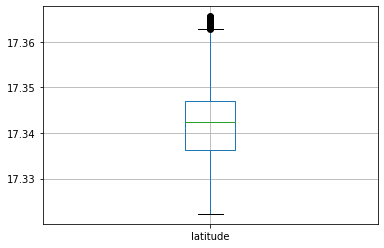

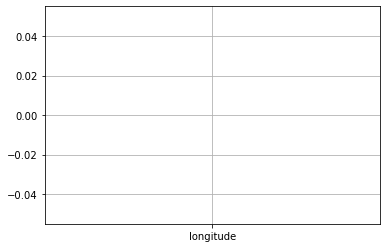

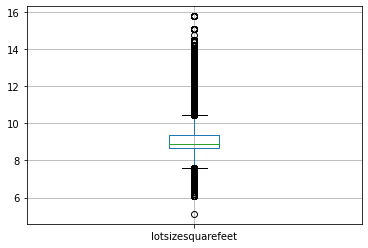

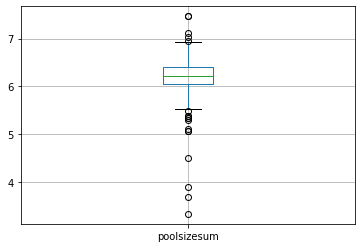

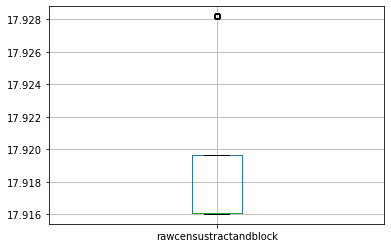

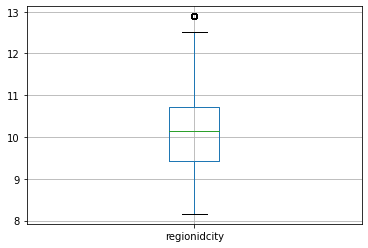

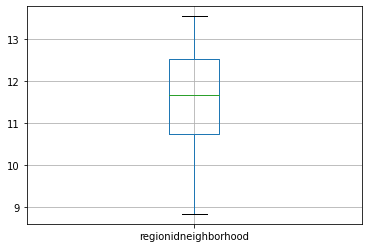

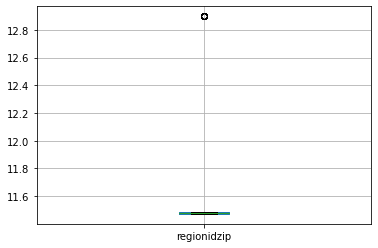

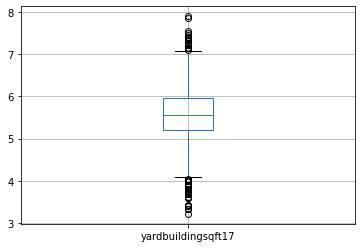

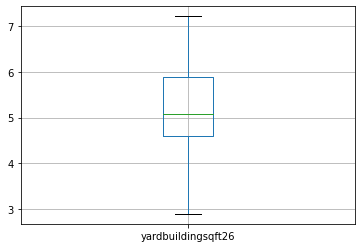

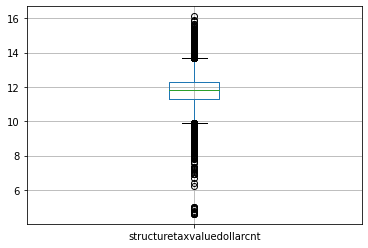

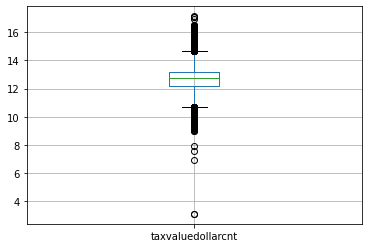

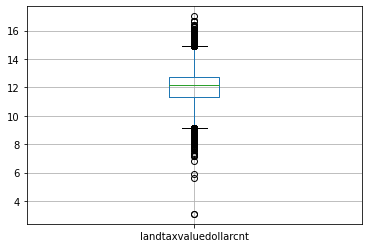

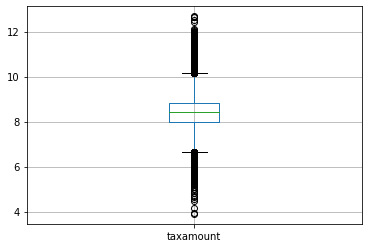

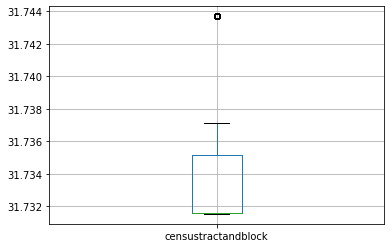

In [28]:
# Analyzing Outliers:

def analyze_outliers(df,var):
    
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.show()
        
for var in cont_vars:
    analyze_outliers(final_df,var)

Anything beyond the max and min line are classified as outliers

## Feature Engineering
In the following cells, we will engineer / pre-process the variables of the House Price Dataset from Kaggle. We will engineer the variables so that we tackle:

* Duplicate check
* Missing values
* Temporal variables
* Selective transformation of incorrectly scaled values
* Standarise the values of all variables to the same range (Standardization)
* Encoding of Categorical variables
* Forming new meaningful features if needed
* Dropping redundant columns
* Multi-Colinearity check and removal
* Outlier check and removal

In [29]:
import math as mat
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
final_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,29.0
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,25.0
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,59.0
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,50.0
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,31.0


### Duplicate entry check

In [31]:
duplicate = final_df[final_df.duplicated("parcelid")]
duplicate.shape

(125, 60)

We observe that there are 125 rows of duplicate data with respect to the same parcelid. Hence, we will go ahead and drop those.

In [32]:
final_df.drop_duplicates(subset="parcelid", keep="first", inplace=True)
final_df.shape

(90150, 60)

### Missing Values

In [33]:
mis_val = [var for var in final_df.columns if final_df[var].isnull().sum()>0]
final_df[mis_val].isnull().sum()

airconditioningtypeid           61402
architecturalstyletypeid        89890
basementsqft                    90107
buildingclasstypeid             90134
buildingqualitytypeid           32866
calculatedbathnbr                1176
decktypeid                      89492
finishedfloor1squarefeet        83300
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
finishedsquarefeet13            90117
finishedsquarefeet15            86595
finishedsquarefeet50            83300
finishedsquarefeet6             89731
fireplacecnt                    80553
fullbathcnt                      1176
garagecarcnt                    60253
garagetotalsqft                 60253
hashottuborspa                  87787
heatingorsystemtypeid           34145
lotsizesquarefeet               10136
poolcnt                         72274
poolsizesum                     89184
pooltypeid10                    88991
pooltypeid2                     88946
pooltypeid7                     73478
propertycoun

Lots of missing value for multiple columns in the dataset. 1168 rows account for 100% of the data. So, in order to avoid generating synthetic data for columns which have more than 60% missing values, I will drop those columns and perform feature engineering on the rest of the data.

#### Dropping columns having > 60% missing values:

In [36]:
def drop_cols_with_max_missing_values(df):
    mis_val = [var for var in final_df.columns if final_df[var].isnull().sum()>0]
    final_df[mis_val].isnull().sum()
    
    limit = np.abs((df.shape[0] * 0.6))
    var_dropping = [var for var in mis_val if final_df[var].isnull().sum() > limit]
    print('Columns with more than 60% missing values: \n\n', var_dropping)
    
    final_df.drop(columns=var_dropping, axis=1, inplace=True)
    return final_df

final_df = drop_cols_with_max_missing_values(final_df)

Columns with more than 60% missing values: 

 ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']


In [37]:
final_df.shape

(90150, 31)

In [38]:
final_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,31.0


In [39]:
final_df['yeardifference'] = final_df['assessmentyear'] - final_df['yearbuilt']
final_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,29.0,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,25.0,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,59.0,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,50.0,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,31.0,31.0


In [40]:
final_df.drop(columns=['assessmentyear', 'yearbuilt', 'transactiondate'], axis=1, inplace=True)
final_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,6.111002e+13,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,6.111002e+13,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,6.111001e+13,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,6.111001e+13,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,6.111001e+13,0.0573,31.0


In [41]:
final_df.shape

(90150, 29)

### Transform Incorrectly Scaled Variables

As mentioned in the data dictionary, the latitude and longitude has been multiplied to 10^6. So I will perform a division of the same to scale it to original. I will perform a similar operation for 'rawcensustractandblock'. Finally, I will perform a division of 10^12 for the 'censustractandblock' variable to bring it to original scale.

In [42]:
final_df[['latitude', 'longitude']] = (final_df[['latitude', 'longitude']])/(10**6)
final_df['censustractandblock'] = (final_df['censustractandblock'])/(10**12)
final_df['rawcensustractandblock'] = (final_df['rawcensustractandblock'])/(10**6)

final_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34.303597,-119.287236,1735.0,1128,265.0,NaN,61.110022,34543.0,2061.0,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34.272866,-119.198911,NaN,1129,266.0,NaN,61.110015,34543.0,2061.0,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34.340801,-119.079610,6569.0,1111,261.0,NaN,61.110007,26965.0,2061.0,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34.354313,-119.076405,7400.0,1110,261.0,NaN,61.110008,26965.0,2061.0,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34.266578,-119.165392,6326.0,1111,261.0,NaN,61.110014,34543.0,2061.0,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0


### Handling missing values

In [43]:
def replace_missing_data(df, mis_vars):
    for var in mis_vars:
        final_df[var] = final_df[var].fillna(final_df[var].mode()[0])
    return df

mis_var = [var for var in final_df.columns if final_df[var].isnull().sum() > 0]
final_df = replace_missing_data(final_df, mis_var)

In [44]:
final_df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
yeardifference                  0
dtype: int64

### Encoding Categorical Variables

In [45]:
cat = final_df.select_dtypes(include='object').columns
cat

Index(['propertycountylandusecode', 'propertyzoningdesc'], dtype='object')

In [46]:
cat_vars = [var for var in final_df.columns if final_df[var].dtypes=='O']
cat_vars

['propertycountylandusecode', 'propertyzoningdesc']

In [47]:
def encode_categorical_variables(df, cat_vars):
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(final_df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        final_df[(var + '_labels')] = var_labels
        
        # dropping the original column since it has already been encoded
        final_df.drop(columns=var, axis=1, inplace=True)
    return final_df

final_df = encode_categorical_variables(final_df, cat_vars)

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90150 entries, 0 to 90274
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   parcelid                          90150 non-null  int64  
 1   bathroomcnt                       90150 non-null  float64
 2   bedroomcnt                        90150 non-null  float64
 3   buildingqualitytypeid             90150 non-null  float64
 4   calculatedbathnbr                 90150 non-null  float64
 5   calculatedfinishedsquarefeet      90150 non-null  float64
 6   finishedsquarefeet12              90150 non-null  float64
 7   fips                              90150 non-null  float64
 8   fullbathcnt                       90150 non-null  float64
 9   heatingorsystemtypeid             90150 non-null  float64
 10  latitude                          90150 non-null  float64
 11  longitude                         90150 non-null  float64
 12  lots

In [51]:
final_df.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,2.0,2.0,34.303597,-119.287236,1735.0,265.0,61.110022,34543.0,2061.0,97081.0,5.0,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0,54,609
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,2.0,34.272866,-119.198911,6000.0,266.0,61.110015,34543.0,2061.0,97083.0,4.0,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0,55,609
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,2.0,2.0,34.340801,-119.079610,6569.0,261.0,61.110007,26965.0,2061.0,97113.0,5.0,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0,50,609
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,2.0,34.354313,-119.076405,7400.0,261.0,61.110008,26965.0,2061.0,97113.0,5.0,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0,49,609
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,2.0,2.0,34.266578,-119.165392,6326.0,261.0,61.110014,34543.0,2061.0,97084.0,8.0,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0,50,609
5,17125829,2.5,4.0,7.0,2.5,2882.0,2882.0,6111.0,2.0,2.0,34.240014,-119.024793,10000.0,261.0,61.110052,51239.0,2061.0,97089.0,8.0,1.0,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0,50,609
6,17132911,2.0,3.0,7.0,2.0,1772.0,1772.0,6111.0,2.0,2.0,34.226842,-119.059815,8059.0,261.0,61.110055,51239.0,2061.0,97089.0,6.0,1.0,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0,50,609
7,17134926,2.5,5.0,7.0,2.5,2632.0,2632.0,6111.0,2.0,2.0,34.229816,-119.050224,7602.0,261.0,61.110055,51239.0,2061.0,97089.0,8.0,1.0,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0,50,609
8,17139988,2.0,3.0,7.0,2.0,1292.0,1292.0,6111.0,2.0,2.0,34.226351,-118.983853,7405.0,261.0,61.110053,51239.0,2061.0,97091.0,6.0,1.0,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0,50,609
9,17167359,1.0,3.0,7.0,1.0,1385.0,1385.0,6111.0,1.0,2.0,34.179289,-119.169287,6000.0,261.0,61.110039,13150.0,2061.0,97104.0,6.0,1.0,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0,50,609


In [52]:
final_df.tail()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
90270,11876798,3.0,4.0,4.0,3.0,2068.0,2068.0,6037.0,3.0,2.0,34.097523,-118.164828,4981.0,261.0,60.372011,12447.0,3101.0,96013.0,0.0,1.0,388582.0,596082.0,207500.0,7335.81,60.372011,0.0276,7.0,2,609
90271,12808516,2.0,3.0,7.0,2.0,1352.0,1352.0,6037.0,2.0,7.0,34.045228,-117.971653,6170.0,261.0,60.374071,39306.0,3101.0,96490.0,0.0,1.0,86209.0,178408.0,92199.0,2441.74,60.374071,-0.1188,59.0,2,1114
90272,12010248,2.0,2.0,4.0,2.0,860.0,860.0,6037.0,2.0,2.0,34.100819,-118.311704,6000.0,266.0,60.371905,12447.0,3101.0,96009.0,0.0,1.0,129000.0,420000.0,291000.0,5070.41,60.371905,0.0843,4.0,9,616
90273,14310905,2.5,3.0,7.0,2.5,2268.0,2268.0,6059.0,2.0,2.0,33.660088,-117.804958,3479.0,261.0,60.590626,52650.0,1286.0,96947.0,0.0,1.0,389474.0,1215816.0,826342.0,12508.30,60.379203,-0.0050,3.0,43,609
90274,14636609,2.5,3.0,7.0,2.5,1812.0,1812.0,6059.0,2.0,2.0,33.928486,-117.944304,6000.0,266.0,60.590012,18874.0,1286.0,96186.0,0.0,1.0,237048.0,471286.0,234238.0,5470.12,60.379203,0.0129,2.0,43,609
